# Tree Node Graph

In [38]:
import networkx as nx
Graph = nx.DiGraph()
Graph.add_node(1, time='5pm')
Graph.add_node(2, time='2pm')
Graph.add_node(3, time='1pm')

In [39]:
Graph.add_edge(1,2)
Graph.add_edge(1,3)

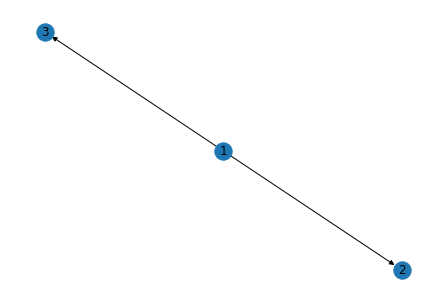

In [40]:
import matplotlib.pyplot as plt
nx.draw(Graph, with_labels = True)

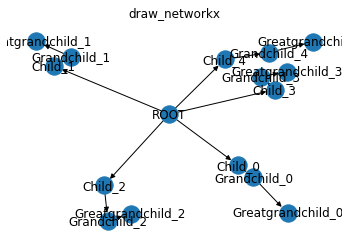

In [41]:
import networkx as nx

Graph = nx.DiGraph()

Graph.add_node("ROOT")

for i in range(5):
    Graph.add_node("Child_%i" % i)
    Graph.add_node("Grandchild_%i" % i)
    Graph.add_node("Greatgrandchild_%i" % i)

    Graph.add_edge("ROOT", "Child_%i" % i)
    Graph.add_edge("Child_%i" % i, "Grandchild_%i" % i)
    Graph.add_edge("Grandchild_%i" % i, "Greatgrandchild_%i" % i)


# same layout using matplotlib with no labels
plt.title('draw_networkx')
nx.draw(Graph,with_labels = True)

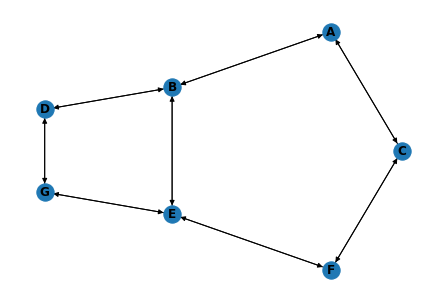

In [49]:
import networkx as nx
class Nodo:
    def __init__(self,nodo,nodosVecinos=None):
        self.nodo=nodo
        self.nodoPadre=None
    def __str__(self):
        return self.nodo
def inicializarNodos():
    A = Nodo("A")
    B = Nodo("B")
    C = Nodo("C")
    D = Nodo("D")
    E = Nodo("E")
    F = Nodo("F")
    G = Nodo("G")
    A.nodosVecinos = [A,B,C]
    B.nodosVecinos = [A,B,D,E]
    C.nodosVecinos = [A,F]
    D.nodosVecinos = [B,G]
    E.nodosVecinos = [B,F,G]
    F.nodosVecinos = [C,E]
    G.nodosVecinos = [D,E]
    
grafico={
    A:A.nodosVecinos,
    B:B.nodosVecinos,
    C:C.nodosVecinos,
    D:D.nodosVecinos,
    E:E.nodosVecinos,
    F:F.nodosVecinos,
    G:G.nodosVecinos    
}
node_graph=nx.DiGraph(grafico)
nx.draw_spectral(node_graph,with_labels=True, font_weight='bold')

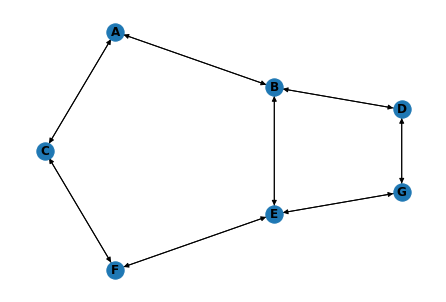

In [2]:
def crear_diccinario(nodo,figura,nodoVisitado):
        if not nodo:
            return -1
        else:        
            if not nodo in nodoVisitado:
                figura[nodo] = nodo.nodosVecinos
                nodoVisitado.append(nodo)
                for nodoVecino in nodo.nodosVecinos:
                    crear_diccinario(nodoVecino,figura,nodoVisitado)
figura={}
crear_diccinario(A,figura,[])
node_graph=nx.DiGraph(figura)
nx.draw_spectral(node_graph,with_labels=True, font_weight='bold') 

In [46]:
inicializarNodos()
def buscar_nodo(nodoInicial,nodoMeta):
    nodosAbiertos=[]
    nodosVisitados=[]
    rutaNodos=[] 
    nodosAbiertos.append(nodoInicial)
    while nodosAbiertos:
        nodo=nodosAbiertos.pop(0)            
        if nodo == nodoMeta:
            print('META')
            return nodo
        if not nodo in nodosVisitados: 
            nodosVisitados.append(nodo)            
            for nodoVecino in nodo.nodosVecinos:
                if not nodoVecino in nodosVisitados: 
                    print("V-"+nodoVecino.nodo)
                    print("P-"+nodo.nodo)
                    nodoVecino.nodoPadre = nodo                
                    nodosAbiertos.append(nodoVecino)
    return False
nodoMeta = buscar_nodo(A,G) 
while nodoMeta:
    print(nodoMeta.nodo)
    nodoMeta=nodoMeta.nodoPadre    

V-B
P-A
V-C
P-A
V-D
P-B
V-E
P-B
V-F
P-C
V-G
P-D
V-F
P-E
V-G
P-E
META
G
E
B
A


In [34]:
def crear_diccionario_padre(nodo,figura):
    if not nodo.nodoPadre:
        return nodo
    else:
        figura[nodo.nodoPadre]=[nodo] 
        crear_diccionario_padre(nodo.nodoPadre,figura)                 

In [53]:
inicializarNodos()
def buscar_nodo_vec(nodoInicial,nodoMeta):
    nodosAbiertos=[]
    nodosVisitados=[]
    rutaNodos=[]   
    nodosAbiertos.append(nodoInicial)
    while nodosAbiertos:
        nodo=nodosAbiertos.pop(0)                    
        if not nodo in nodosVisitados: 
            nodosVisitados.append(nodo)            
            for nodoVecino in nodo.nodosVecinos:
                if not nodoVecino in nodosVisitados:                    
                    print("V-"+nodoVecino.nodo)
                    print("P-"+nodo.nodo)
                    nodoVecino.nodoPadre = nodo     
                    if nodoVecino == nodoMeta:
                        print('META')
                        return nodoVecino
                    nodosAbiertos.append(nodoVecino)
    return False
nodoMeta = buscar_nodo_vec(A,G) 
figura={}
crear_diccionario_padre(nodoMeta,figura)
print(figura)
node_graph=nx.DiGraph(figura)
nx.draw(node_graph,with_labels=True, font_weight='bold') 

V-B
P-A
V-C
P-A
V-D
P-B
V-E
P-B
V-F
P-C
V-G
P-D
META


RecursionError: maximum recursion depth exceeded

In [54]:
inicializarNodos()
nodoMeta = buscar_nodo_vec(C,G) 
figura={}
crear_diccionario_padre(nodoMeta,figura)
print(figura)
node_graph=nx.DiGraph(figura)
nx.draw(node_graph,with_labels=True, font_weight='bold') 

V-A
P-C
V-F
P-C
V-B
P-A
V-E
P-F
V-D
P-B
V-E
P-B
V-G
P-E
META


RecursionError: maximum recursion depth exceeded